# Computing min distance growth as a function of n

# We first consider the case of $\ell$ fixed

In [1]:
#auxiliary functions

def bin_entropy(x):
    
    return -x*log(x,2)-(1-x)*log(1-x,2)

#equation to find the value of t, as a function of theta_val, ell and alpha_val
def find_t_numerical(theta_val, ell, alpha_val):

    R.<x> = RR[]
    f = (1-2*x)*log((1-x)/x)-2 - 2*theta_val*ell/alpha_val #function whose root returns t
    
    t = find_root(f, 1e-6, 0.5-1e-6) #numerical root finding
    
    return t

#compute min distance
def min_distance_ldpc(n, alpha_val, ell):
    
    b_theta = -1
    w = 2
    while b_theta <0:
        w += 1
        theta_val = w/n
        t = find_t_numerical(theta_val, ell, alpha_val)
        
        p_theta = -alpha_val*log(2)+alpha_val*bin_entropy(t)+theta_val*ell*log(1-2*t)
        
        b_theta = bin_entropy(theta_val) + p_theta
        
    return w

For random codes with same parameters, the min distance is given by

$\min\left\{w\left| \frac{\binom{n}{w}}{2^m}\geq 1\right.\right\}$

Asymptotically, considering that $m = \alpha n$ and $\lim_{n\rightarrow \infty} \frac{1}{n}\binom{n}{w} = H(\Theta)$, we obtain

$b_\Theta = H(\Theta) - \alpha$

So, the minimum relative distance is given by
$\Theta^*: \Theta\in[0 ; 1]$ such that $H(\Theta) = \alpha$

In [2]:
#compute min distance of random code
def min_distance_rnd(alpha_val):
    
    R.<x> = RR[]
    f = -x*log(x,2)-(1-x)*log(1-x,2)-alpha_val
    theta_val = find_root(f, 1e-6, 0.5-1e-6) #numerical root finding
        
    return theta_val

Test for some values of $n$

In [5]:
alpha_val = 0.5 #ratio between m and n
ell = 15

n_min = 1000; n_max = 10000; n_step = 1000
n_vals = range(n_min, n_max + 1, n_step)

for n in n_vals:
    
    #First computing for LDPC codes
    w_ldpc = min_distance_ldpc(n, alpha_val, ell)
    theta_ldpc = N(w_ldpc/n)
    
    #Now, for random code with same values of n and m
    theta_rnd = min_distance_rnd(alpha_val)
    print(n, theta_ldpc, theta_rnd)

1000 0.0630000000000000 0.1100278644383603
2000 0.0630000000000000 0.1100278644383603
3000 0.0626666666666667 0.1100278644383603
4000 0.0627500000000000 0.1100278644383603
5000 0.0626000000000000 0.1100278644383603
6000 0.0626666666666667 0.1100278644383603
7000 0.0625714285714286 0.1100278644383603
8000 0.0626250000000000 0.1100278644383603
9000 0.0625555555555556 0.1100278644383603
10000 0.0626000000000000 0.1100278644383603


# Now we do the same but consider different code rates

To simulate the asymptotic, we use a very large value of $n$ for the case of LDPC codes

In [6]:
ell = 7; n = 1000

ldpc_vals = []; rnd_vals = []

for alpha_int in range(5,96,1):
    alpha_val = alpha_int/100
    
    #First computing for LDPC codes
    w_ldpc = min_distance_ldpc(n, alpha_val, ell)
    theta_ldpc = N(w_ldpc/n)
    
    #Now, for random code with same values of n and m
    theta_rnd = min_distance_rnd(alpha_val)
    
    #We verify also without doing asymptotics
    w = 1
    while log(1.*binomial(n,w),2)<(alpha_val*n):
        w += 1
#    M = binomial(n, round(theta_rnd*n))*2^(-n*alpha_val)
    print(N(alpha_val), theta_ldpc, theta_rnd, N(w/n))
    
    #store values for later
    ldpc_vals.append((alpha_val, theta_ldpc))
    rnd_vals.append((alpha_val, theta_rnd))

0.0500000000000000 0.00300000000000000 0.005607170053118849 0.00600000000000000
0.0600000000000000 0.00300000000000000 0.006975884932991759 0.00800000000000000
0.0700000000000000 0.00400000000000000 0.008401610530398078 0.00900000000000000
0.0800000000000000 0.00400000000000000 0.009880517580682077 0.0110000000000000
0.0900000000000000 0.00500000000000000 0.011409693920275491 0.0120000000000000
0.100000000000000 0.00500000000000000 0.012986862055345324 0.0140000000000000
0.110000000000000 0.00600000000000000 0.01461020488326073 0.0160000000000000
0.120000000000000 0.00700000000000000 0.016278251891209253 0.0170000000000000
0.130000000000000 0.00700000000000000 0.017989801479985388 0.0190000000000000
0.140000000000000 0.00800000000000000 0.019743866033291552 0.0210000000000000
0.150000000000000 0.00900000000000000 0.02153963192989523 0.0230000000000000
0.160000000000000 0.0100000000000000 0.02337642972663139 0.0250000000000000
0.170000000000000 0.0100000000000000 0.025253711474655983 0.

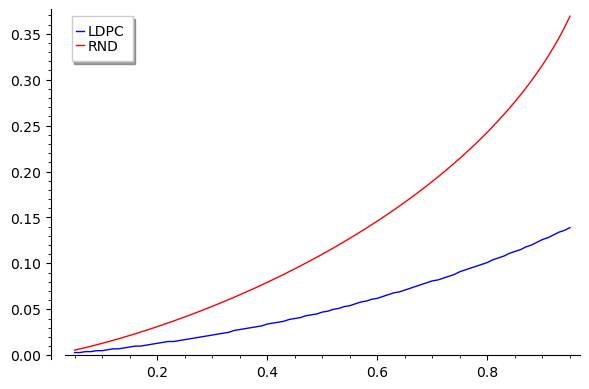

In [7]:
g = list_plot(ldpc_vals, plotjoined=True, color = 'blue',legend_label = "LDPC")
g += list_plot(rnd_vals, plotjoined=True, color = 'red',legend_label = "RND")
g.show()

# Plotting costs considering Stern's ISD

In [30]:
load('stern.sage')

In [32]:
ell = 7; n = 1000

ldpc_vals = []; rnd_vals = []

for alpha_int in range(5,96,1):
    alpha_val = alpha_int/100
    
    #First computing for LDPC codes
    w_ldpc = min_distance_ldpc(n, alpha_val, ell)
    theta_ldpc = N(w_ldpc/n)
    cost_ldpc, params = optimize_stern(1-alpha_val, 2, theta_ldpc)
    ldpc_vals.append((alpha_val, cost_ldpc))
    
    #Now, for random code with same values of n and m
    theta_rnd = min_distance_rnd(alpha_val)
    cost_rnd, params = optimize_stern(1-alpha_val, 2, theta_rnd)
    rnd_vals.append((alpha_val, cost_rnd))
    
    print(N(alpha_val), N(cost_ldpc), N(cost_rnd))

0.0500000000000000 0.0118957608887079 0.0161559416063772
0.0600000000000000 0.0115618892261111 0.0191733007687045
0.0700000000000000 0.0112419415401794 0.0221268844844705
0.0800000000000000 0.0109349469639981 0.0250181794233052
0.0900000000000000 0.0154402967662703 0.0278483715873086
0.100000000000000 0.0150447744852866 0.0306184293304947
0.110000000000000 0.0146629279734264 0.0333291503248733
0.120000000000000 0.0186456355010024 0.0359812081012264
0.130000000000000 0.0181908317792121 0.0385751684336247
0.140000000000000 0.0177499557247750 0.0411115115564358
0.150000000000000 0.0213124587373419 0.0435906447541848
0.160000000000000 0.0208092508382713 0.0460129130809614
0.170000000000000 0.0203199711218689 0.0483786088142913
0.180000000000000 0.0235265851241629 0.0506879800895352
0.190000000000000 0.0229828283812743 0.0529412228907151
0.200000000000000 0.0259410621206704 0.0551385066189482
0.210000000000000 0.0253485211699728 0.0572799543289566
0.220000000000000 0.0280824234538000 0.0593

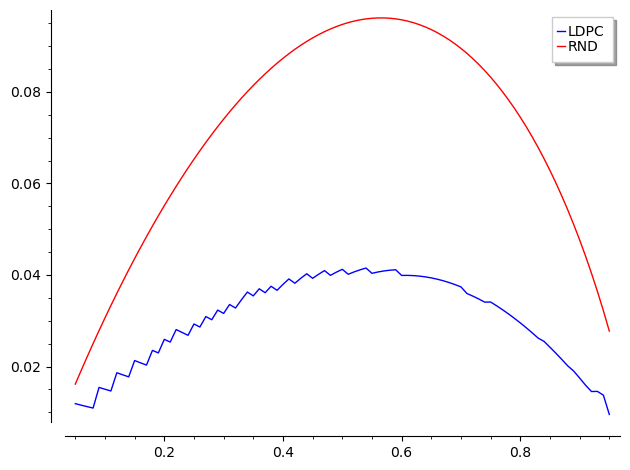

In [33]:
g = list_plot(ldpc_vals, plotjoined=True, color = 'blue',legend_label = "LDPC")
g += list_plot(rnd_vals, plotjoined=True, color = 'red',legend_label = "RND")
g.show()